In [56]:
import cv2 as cv
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d    

import numpy as np
import plot

plt.style.use('dark_background') 

%matplotlib inline

PATH = '../img/'
path2 = "C:/Users/yanet/Pictures/Camera Roll/WIN_20231014_16_36_37_Pro.jpg"

In [68]:
im = cv.imread(PATH+'lenna.png', cv.IMREAD_COLOR)
# im = cv.imread(path2, cv.IMREAD_COLOR)
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
print(img.shape)
# plot.imgview(img)

(512, 512, 3)


In [58]:
def pencil_sketch_col(img):
    #inbuilt function to create sketch effect in colour and greyscale
    sk_gray, sk_color = cv.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.1) 
    return  sk_color

In [60]:
def HDR(img):
    hdr = cv.detailEnhance(img, sigma_s=12, sigma_r=0.15)
    return  hdr

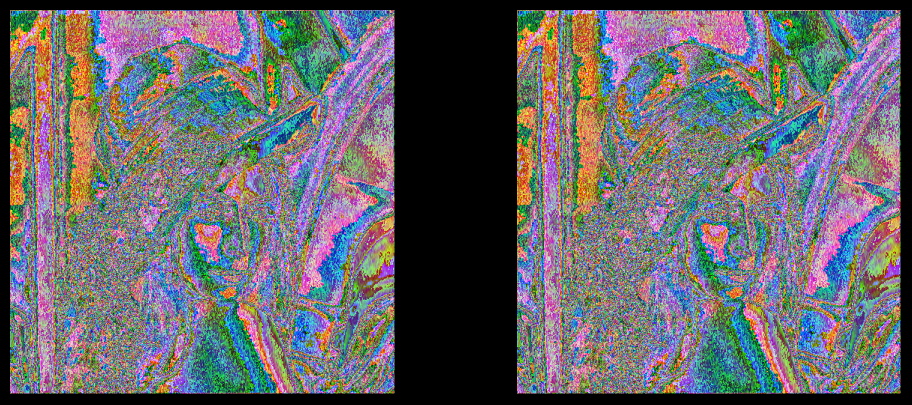

In [152]:
# imagen = img

def sharpen_img(imagen):
    kernel = np.array([[-1, -1, -1],
                    [-1, 9.5, -1],
                    [-1, -1, -1]])

    imagen = np.pad(imagen, ((1,1), (1,1), (0, 0)), 'constant', constant_values=255)

    alto, ancho, _ = imagen.shape
    tam_kernel = kernel.shape[0]

    imagen_conv = np.zeros((alto, ancho, 3), dtype=np.uint8)

    for y in range(alto - tam_kernel + 1):
        for x in range(ancho - tam_kernel + 1):
            region = imagen[y:y + tam_kernel, x:x + tam_kernel]
            resultado = (region * kernel).sum(axis=(0, 1))
            imagen_conv[y, x] = resultado

            # break
    # print(imagen_convolucionada)
    plot.imgcmp(imagen_conv, cv.convertScaleAbs(imagen_conv))
    # imagen_convolucionada = cv.convertScaleAbs(imagen_convolucionada)
    # return imagen_convolucionada

a = sharpen_img(img)

# plot.imgview(a)


In [137]:
""" 
Universidad Francisco Marroquin
Computer Vision
Author: Christian Medina Armas
Version: 0.1
"""
import sys ; sys.path.append("../")
import plot
import cv2 as cv


# get camera handle 
device_id = 0
cap = cv.VideoCapture(device_id)

# verify that video handle is open
if (cap.isOpened() == False):
    print("Video capture failed to open")

# set video capture properties
# hardware specific

# cap.set(cv.CAP_PROP_FRAME_WIDTH, 1024);cap.set(cv.CAP_PROP_FRAME_HEIGHT, 576)
# cap.set(cv.CAP_PROP_FRAME_WIDTH, 800);cap.set(cv.CAP_PROP_FRAME_HEIGHT, 600)


# get frame, apply processing and show result
while True:
    ret, im_rgb = cap.read()
    im = im_rgb[:,:,:]
    print(im.shape)

    if ret:
        # apply operation
        # blur = cv.GaussianBlur(im, (0,0), 15)
        blur = sharpen_img(im)
        # plot.imgcmp(im,blur)
        # break
        
        # create windows
        win0 = 'Original'
        win1 = 'Processed'

        r,c = im.shape[0:2]
        resize_factor = 1

        R = int(r//resize_factor)
        C = int(c//resize_factor)
        win_size = (C, R) 

        cv.namedWindow(win0, cv.WINDOW_NORMAL)
        cv.namedWindow(win1, cv.WINDOW_NORMAL)

        cv.resizeWindow(win0, (win_size[0]//2,win_size[1]//2))
        cv.resizeWindow(win1, win_size)

        cv.imshow(win0, im)
        cv.imshow(win1, blur)
	
        # align windows        
        cv.moveWindow(win1, 0, 0)
        cv.moveWindow(win0, C, 0)
        
        # exit with q
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

#clean up before exit
cap.release()
cv.destroyAllWindows()


(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [121]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv.filter2D(img, 5, kernel)
    return img_sharpen

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


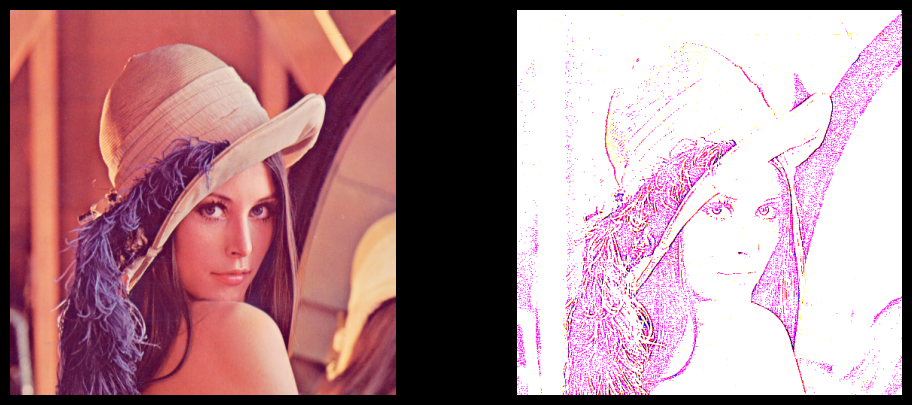

In [122]:
im_sh = sharpen(img)
plot.imgcmp(img, im_sh)

In [95]:
im_sh

array([[[255, 206, 188],
        [255, 206, 164],
        [255, 208, 238],
        ...,
        [255, 255, 216],
        [255, 234, 189],
        [174,   0,  15]],

       [[255, 206, 188],
        [255, 206, 164],
        [255, 208, 238],
        ...,
        [255, 255, 216],
        [255, 234, 189],
        [174,   0,  15]],

       [[255, 206, 188],
        [255, 206, 164],
        [255, 208, 238],
        ...,
        [255, 255, 216],
        [255, 234, 189],
        [174,   0,  15]],

       ...,

       [[126,   0,  99],
        [ 99,   0,  99],
        [158,  60,  69],
        ...,
        [252, 146, 165],
        [234,  95,  77],
        [255,  40, 120]],

       [[117,  45,  76],
        [ 81,  16,  68],
        [197, 106, 113],
        ...,
        [255, 114, 116],
        [255, 112, 130],
        [255, 147, 134]],

       [[123,  33,  86],
        [ 81,   3,  70],
        [195,  90, 108],
        ...,
        [255, 114, 118],
        [255, 100, 128],
        [255, 129, 122]]

In [98]:
img[:,:,0] = np.pad(img[:,:,0], (2, 3), 'constant', constant_values=(4, 6))

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

In [119]:

new_img[:,:,0] = np.pad(img[:,:,0], 1, 'constant', constant_values=255)
new_img[:,:,1] = np.pad(img[:,:,1], 1, 'constant', constant_values=255)
new_img[:,:,2] = np.pad(img[:,:,2], 1, 'constant', constant_values=255)

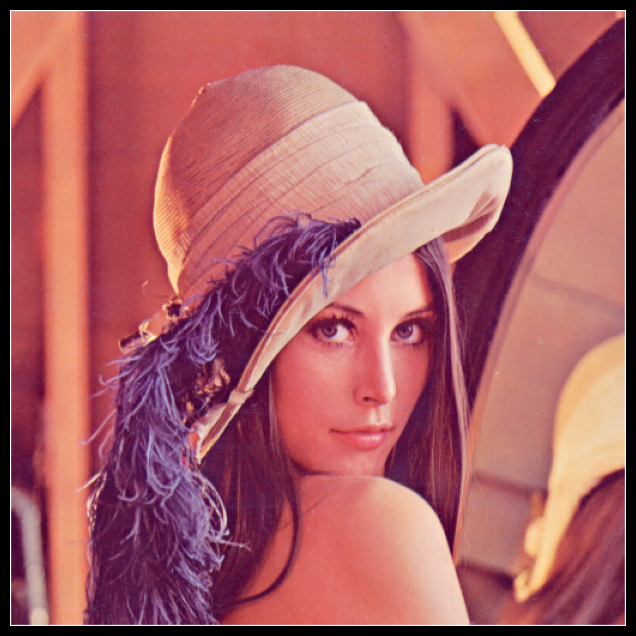

In [120]:
plot.imgview(new_img)

In [115]:
new_img = np.zeros((img.shape[0]+2, img.shape[1]+2, 3), dtype=np.uint8)

In [96]:
a = [1, 2, 3, 4, 5]
np.pad(a, (2, 3), 'constant', constant_values=(4, 6))

array([4, 4, 1, 2, 3, 4, 5, 6, 6, 6])